In [4]:
from pylab import *
import radmc3dPy as rpy
import numpy as np
import os
from scipy.interpolate import griddata
from models import *
from IPython import display

In [5]:
from astropy.io import fits

In [6]:
thing = fits.open('/Users/aleksandra/Desktop/TSAV0p01sm.fits')

In [7]:
thing.info()

Filename: /Users/aleksandra/Desktop/TSAV0p01sm.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      57   (49, 57)   float32   


In [8]:
print(thing[0].header)

SIMPLE  =                    T /                                                BITPIX  =                  -32 /                                                NAXIS   =                    2                                                  NAXIS1  =                   49 /                                                NAXIS2  =                   57 /                                                COMMENT  FITS (Flexible Image Transport System) format is defined in 'Astronomy COMMENT  and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H  COMMENT  nemo::fitsio.c $Id$                                                    DATASUM = '0000000000000000'                                                    CHECKSUM= '0000000000000000'                                                    CDELT1  =      1.250000000E-01 /                                                CDELT2  =      1.250000000E-01 /                                                CRPIX1  =      1.000000000E+00 /        

In [9]:
array = thing[0].data

In [10]:
log_n = np.cumsum(np.ones(49)*0.125) - 0.125
log_F = np.linspace(-3.29588079,-3.29588079+ 57*0.125, 57) - np.log10(G0)


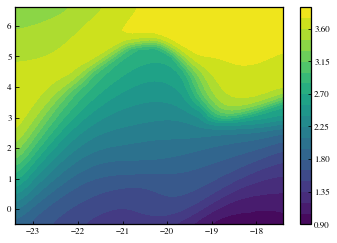

In [11]:
contourf(log_n+np.log10(mu*mh),log_F,np.log10(array),levels=25)
colorbar()

In [12]:
## gas temperature for unattenuated UV flux from PDR regions, can put in UV Flux from Radmc3d calculations

In [18]:
os.system('~/bin/optool -o /Users/aleksandra/Desktop/wedgeford -radmc TEST -l /Users/aleksandra/Desktop/wedgeford/m1_test/wavelength_micron.inp')

0

In [22]:
atable = np.loadtxt('./models/Zdust.txt',usecols=(2,3))
print(np.sum(atable[:,0]*atable[:,1]))


0.0005144495562


In [23]:
btable = np.loadtxt('./models/BB_xray_table1.txt')

In [37]:
ftable = np.loadtxt('./models/BB_xray_table2.txt')

In [26]:
bdict = {'e1':btable[:,0],'e2':btable[:,1],'gas_c':[btable[:,5],btable[:,6],btable[:,7]],'dust_c':[btable[:,8],btable[:,9],btable[:,10]]}

In [46]:
fdict = {'e1':ftable[:,0],'e2':ftable[:,1],'a1':[ftable[:,2],ftable[:,3],ftable[:,4]],'a10':[ftable[:,5],ftable[:,6],ftable[:,7]],'a100':[ftable[:,8],ftable[:,9],ftable[:,10]]}

In [27]:
bdict['lam'] = 1e-4*(h*c)/((bdict['e1']+bdict['e2'])*0.5)

In [39]:
fdict['lam'] = 1e-4*(h*c)/((fdict['e1']+fdict['e2'])*0.5)

In [31]:
bdict['E'] = (bdict['e1']+bdict['e2'])*0.5

In [48]:
fdict['E'] = (fdict['e1']+fdict['e2'])*0.5

In [29]:
def fit_kappa(E,coeff):
    return (1.0e-24/mh)*(coeff[0]+coeff[1]*E + coeff[2]*E**2)/E**3

In [32]:
bdict['kappa_gas'] = fit_kappa(bdict['E'],bdict['gas_c'])
bdict['kappa_dust'] = fit_kappa(bdict['E'],bdict['dust_c'])

In [49]:
fdict['kappa_1'] = fit_kappa(fdict['E'],fdict['a1'])
fdict['kappa_10'] = fit_kappa(fdict['E'],fdict['a10'])
fdict['kappa_100'] = fit_kappa(fdict['E'],fdict['a100'])

(10, 1000)

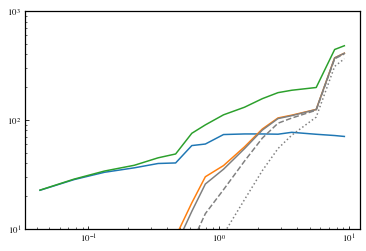

In [51]:
loglog(bdict['E'],bdict['kappa_gas']*bdict['E']**3)
loglog(bdict['E'],bdict['kappa_dust']*bdict['E']**3)
loglog(bdict['E'],(bdict['kappa_gas']+bdict['kappa_dust'])*bdict['E']**3)

loglog(fdict['E'],fdict['kappa_1']*fdict['E']**3,color='gray')
loglog(fdict['E'],fdict['kappa_10']*fdict['E']**3,color='gray',ls='dashed')
loglog(fdict['E'],fdict['kappa_100']*fdict['E']**3,color='gray',ls='dotted')
ylim(10,1000)

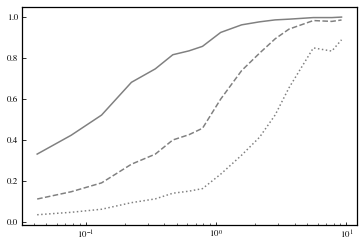

In [60]:
semilogx(fdict['E'],fdict['kappa_10']/bdict['kappa_dust'],color='gray',ls='dashed')
semilogx(fdict['E'],fdict['kappa_100']/bdict['kappa_dust'],color='gray',ls='dotted')
semilogx(fdict['E'],fdict['kappa_1']/bdict['kappa_dust'],color='gray')

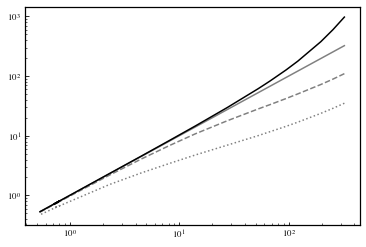

In [59]:
loglog(fdict['kappa_1'],fdict['kappa_10'],color='gray',ls='dashed')
loglog(fdict['kappa_1'],fdict['kappa_100'],color='gray',ls='dotted')
loglog(fdict['kappa_1'],fdict['kappa_1'],color='gray')
loglog(fdict['kappa_1'],bdict['kappa_dust'],color='black')

In [61]:
from scipy.optimize import curve_fit

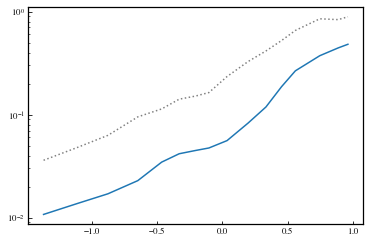

In [163]:
mmE = np.log10(np.array([0.03,0.1,0.2,0.3,0.4,1,2,3,4,10]))
mma = np.ones_like(mmE)*3
mmf = np.array([0.009,0.015,0.02,0.03,0.04,0.05,0.1,0.2,0.3,0.5])

func = interpolate.interp1d(mmE, mmf)



In [223]:
from scipy import interpolate


mmE = np.log10(np.array([0.03,0.1,0.2,0.3,0.4,1,2,3,4,10]))
mma = np.ones_like(mmE)*3
mmf = np.array([0.009,0.015,0.02,0.03,0.04,0.05,0.1,0.2,0.3,0.5])

func = interpolate.interp1d(mmE, mmf)


loge = np.log10(np.concatenate((fdict['E'],fdict['E'],fdict['E'],fdict['E'])))
amax = np.concatenate((np.ones_like(fdict['E'])*0,np.ones_like(fdict['E'])*1,np.ones_like(fdict['E'])*2,np.ones_like(fdict['E'])*3))
factor = np.concatenate((fdict['kappa_1']/bdict['kappa_dust'],fdict['kappa_10']/bdict['kappa_dust'],fdict['kappa_100']/bdict['kappa_dust'],func(np.log10(fdict['E']))))

new_e = np.linspace(np.amin(loge),1,100)
new_a = np.linspace(0,3.1,100)
E,A = np.meshgrid(new_e,new_a)
f_new = interpolate.griddata(points = (loge, amax), values=factor, xi=(E,A),method='cubic',rescale=False)


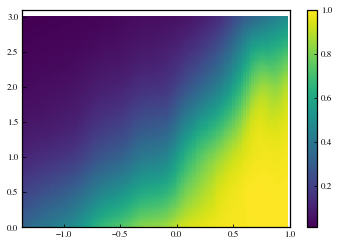

In [224]:
pcolormesh(E,A,f_new)
colorbar()

1.0
2.0565123083486516
4.229242874389499
8.697490026177835
17.886495290574352
36.783797718286344
75.64633275546291
155.56761439304722
319.92671377973846
657.9332246575682


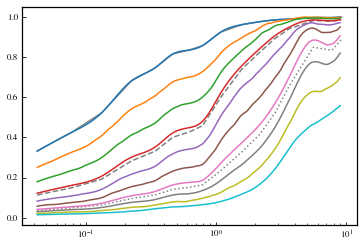

In [229]:
semilogx(fdict['E'],fdict['kappa_10']/bdict['kappa_dust'],color='gray',ls='dashed')
semilogx(fdict['E'],fdict['kappa_100']/bdict['kappa_dust'],color='gray',ls='dotted')
semilogx(fdict['E'],fdict['kappa_1']/bdict['kappa_dust'],color='gray')
for j in range(0,100,10):
    semilogx(10**new_e, f_new[j,:])
    print(10**new_a[j])

(1, 800)

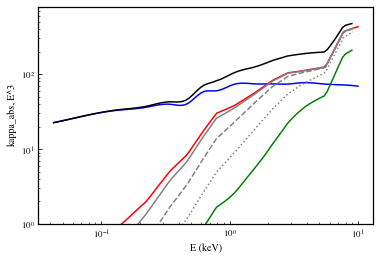

In [236]:
#loglog(bdict['E'],bdict['kappa_gas']*bdict['E']**3)
#loglog(bdict['E'],bdict['kappa_dust']*bdict['E']**3)
#loglog(bdict['E'],(bdict['kappa_gas']+bdict['kappa_dust'])*bdict['E']**3)

func_gas = interpolate.interp1d(np.log10(bdict['E']),np.log10(bdict['kappa_gas']),fill_value='extrapolate',kind='cubic')
func_dust = interpolate.interp1d(np.log10(bdict['E']),np.log10(bdict['kappa_dust']),fill_value='extrapolate',kind='linear')

loglog(10**new_e,10**func_gas(new_e)*(10**new_e)**3,color='blue')
loglog(10**new_e,10**func_dust(new_e)*(10**new_e)**3,color='red')

kappa_abs = 10**(func_gas(new_e)) + 10**(func_dust(new_e))*f_new[10,:]

loglog(10**new_e,f_new[93,:]*10**(func_dust(new_e))*(10**new_e)**3,color='green')
loglog(10**new_e,kappa_abs*(10**new_e)**3,color='black')
loglog(fdict['E'],fdict['kappa_1']*fdict['E']**3,color='gray')
loglog(fdict['E'],fdict['kappa_10']*fdict['E']**3,color='gray',ls='dashed')
loglog(fdict['E'],fdict['kappa_100']*fdict['E']**3,color='gray',ls='dotted')
xlabel('E (keV)')
ylabel('kappa_abs, E^3')
ylim(1,800)

In [ ]:
# return as an absorption opacity, given some amax and dust to gas ratio
#to-do draine's x-ray scattering function for kappa_scat for x-rays